## Setup

### Download the data

In [1]:
!wget "https://www.dropbox.com/scl/fi/vs18rypduppjv4ywye2f2/train_dataset_train_data_Mediawise.zip?rlkey=3b10en8rbsdglcbiuwcydwpp6&st=vbeiqkz3&dl=0" -O data.zip

--2024-07-07 02:17:30--  https://www.dropbox.com/scl/fi/vs18rypduppjv4ywye2f2/train_dataset_train_data_Mediawise.zip?rlkey=3b10en8rbsdglcbiuwcydwpp6&st=vbeiqkz3&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucca91153992a617afec8ea3f722.dl.dropboxusercontent.com/cd/0/inline/CWOXWzWOtt07UbuvGCt6EPiRYMWnVCv6dCMVNzUkgtFSJeqxIfU2UAeKFu5h38fWrNvhMDA6kYRj4SbGK6mNNAvdZXLmqR8jssO_YHxI7O19GUUBdL6VQgnW1gPihTTj8woC2Fgvchf4oUe_EE6bHyZ4/file# [following]
--2024-07-07 02:17:31--  https://ucca91153992a617afec8ea3f722.dl.dropboxusercontent.com/cd/0/inline/CWOXWzWOtt07UbuvGCt6EPiRYMWnVCv6dCMVNzUkgtFSJeqxIfU2UAeKFu5h38fWrNvhMDA6kYRj4SbGK6mNNAvdZXLmqR8jssO_YHxI7O19GUUBdL6VQgnW1gPihTTj8woC2Fgvchf4oUe_EE6bHyZ4/file
Resolving ucca91153992a617afec8ea3f722.dl.dropboxusercontent.com (ucca91153992a617afec8ea3f722.dl.dropboxusercontent.com)... 162

In [2]:
!unzip data.zip

Archive:  data.zip
   creating: train_data_Mediawise/
  inflating: train_data_Mediawise/readme.md  
  inflating: __MACOSX/train_data_Mediawise/._readme.md  
  inflating: train_data_Mediawise/baseline.ipynb  
  inflating: __MACOSX/train_data_Mediawise/._baseline.ipynb  
  inflating: train_data_Mediawise/train_data.json  


### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(8642)

## EDA

In [6]:
df = pd.read_json('train_data_Mediawise/train_data.json')
df

,hash,targetAudience,points,value
0,41567f28db47bee7,"{'name': 'All 25-45 BC', 'gender': 'all', 'age...","[{'lat': '55.573691', 'lon': '37.631423', 'azi...",23.51
1,94b6df335598a161,"{'name': 'W 30-60', 'gender': 'female', 'ageFr...","[{'lat': '55.656665886902', 'lon': '37.7408534...",1.20
2,2ef4e73f0d2c51d0,"{'name': 'W 30-60', 'gender': 'female', 'ageFr...","[{'lat': '55.680953807163', 'lon': '37.6644265...",4.65
3,b3ebb77f965de304,"{'name': 'W 30+ BC', 'gender': 'female', 'ageF...","[{'lat': '55.741072317672', 'lon': '37.6526972...",32.09
4,76059b6cbb303166,"{'name': 'W 30+ BC', 'gender': 'female', 'ageF...","[{'lat': '55.656665886902', 'lon': '37.7408534...",26.12
...,...,...,...,...
1542,75563c4cce5ca6c0,"{'name': 'All 30-55 BC', 'gender': 'all', 'age...","[{'lat': '55.961879', 'lon': '37.333988', 'azi...",20.55
1543,ed4353d7c33dd21c,"{'name': '35-100 C', 'gender': 'all', 'ageFrom...","[{'lat': '55.752846850282', 'lon': '37.5875834...",59.32
1544,77a82843b71a77ec,"{'name': '35-100 C', 'gender': 'all', 'ageFrom...","[{'lat': '55.752846850282', 'lon': '37.5875834...",41.30
1545,87b45be3fae91c39,"{'name': 'M 25-55 ', 'gender': 'male', 'ageFro...","[{'lat': '55.662899746091', 'lon': '37.4817413...",59.15


In [7]:
df_norm = pd.concat([df, pd.json_normalize(df['targetAudience'])], axis=1).drop(['targetAudience', 'id'], axis=1)
df_norm

,hash,points,value,name,gender,ageFrom,ageTo,income
0,41567f28db47bee7,"[{'lat': '55.573691', 'lon': '37.631423', 'azi...",23.51,All 25-45 BC,all,25,45,bc
1,94b6df335598a161,"[{'lat': '55.656665886902', 'lon': '37.7408534...",1.20,W 30-60,female,30,60,abc
2,2ef4e73f0d2c51d0,"[{'lat': '55.680953807163', 'lon': '37.6644265...",4.65,W 30-60,female,30,60,abc
3,b3ebb77f965de304,"[{'lat': '55.741072317672', 'lon': '37.6526972...",32.09,W 30+ BC,female,30,100,bc
4,76059b6cbb303166,"[{'lat': '55.656665886902', 'lon': '37.7408534...",26.12,W 30+ BC,female,30,100,bc
...,...,...,...,...,...,...,...,...
1542,75563c4cce5ca6c0,"[{'lat': '55.961879', 'lon': '37.333988', 'azi...",20.55,All 30-55 BC,all,30,55,bc
1543,ed4353d7c33dd21c,"[{'lat': '55.752846850282', 'lon': '37.5875834...",59.32,35-100 C,all,35,100,c
1544,77a82843b71a77ec,"[{'lat': '55.752846850282', 'lon': '37.5875834...",41.30,35-100 C,all,35,100,c
1545,87b45be3fae91c39,"[{'lat': '55.662899746091', 'lon': '37.4817413...",59.15,M 25-55,male,25,55,abc


In [8]:
df_norm.describe()

,value,ageFrom,ageTo
count,1547.000000,1547.000000,1547.000000
mean,22.755346,24.664512,63.158371
std,23.774141,6.401148,21.249643
min,0.000000,12.000000,24.000000
25%,2.275000,18.000000,50.000000
50%,15.040000,25.000000,55.000000
75%,35.425000,25.000000,65.000000
max,96.750000,45.000000,100.000000


## income analysis
предположения:
- a - маленький заработок
- b - средний класс
- c - богатый класс

In [9]:
df_norm.groupby('income')[['value']].mean()

,value
income,
ab,25.931818
abc,20.286406
ac,18.860000
bc,24.029920
c,24.217934


In [10]:
df_norm.groupby('income')[['ageFrom']].min()

,ageFrom
income,
ab,25
abc,12
ac,35
bc,18
c,18


In [11]:
df_norm.groupby('income')[['ageTo']].max()

,ageTo
income,
ab,50
abc,100
ac,60
bc,100
c,100


<Axes: ylabel='income'>

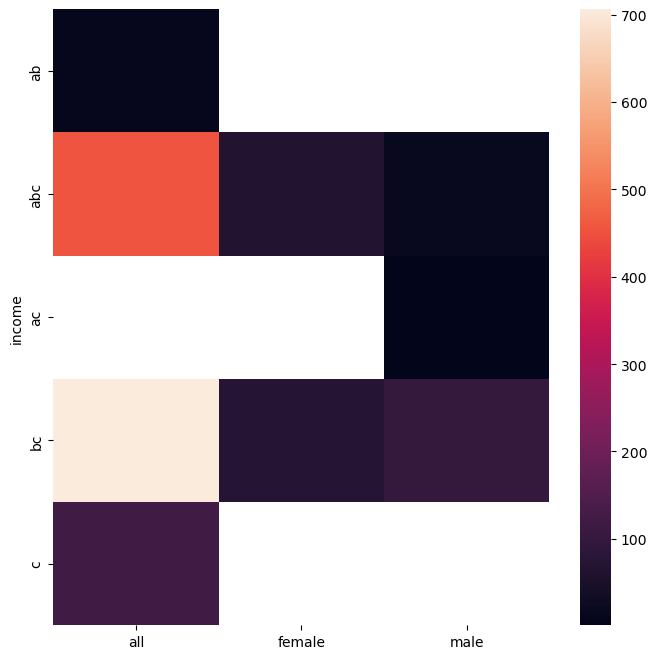

In [12]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({x_label: grp['income'].value_counts() for x_label, grp in df_norm.groupby('gender')})
sns.heatmap(df_2dhist)

<Axes: xlabel='income', ylabel='value'>

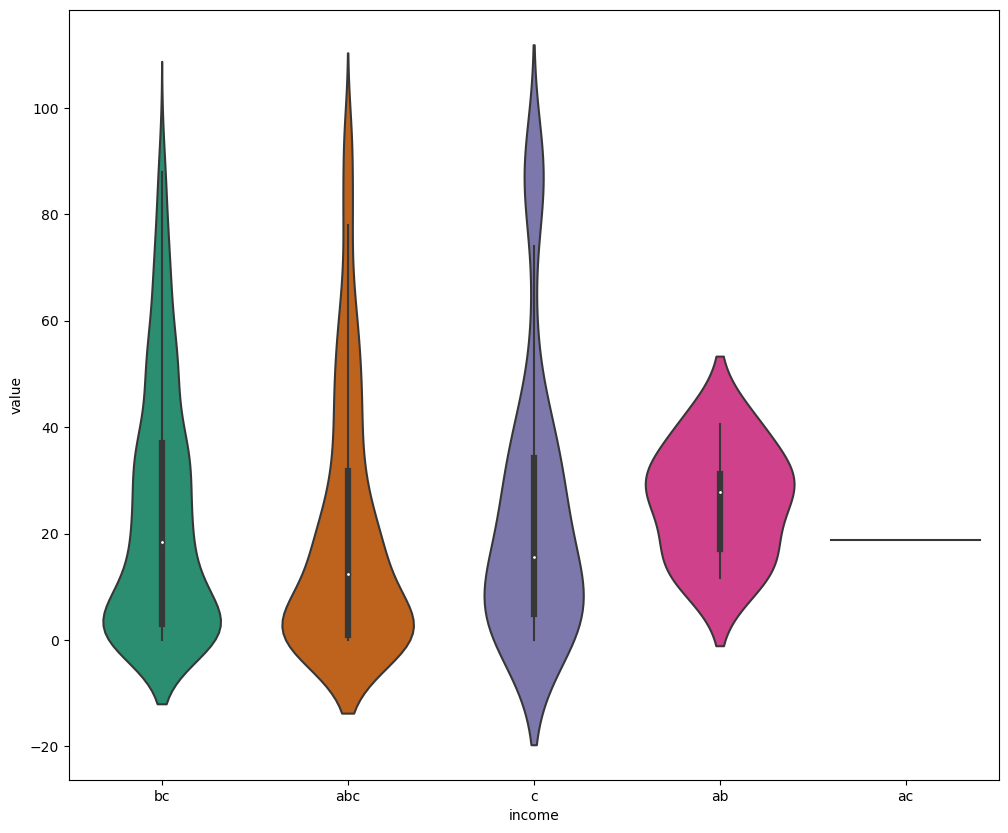

In [13]:
plt.figure(figsize=(12, 10))
sns.violinplot(df_norm, x='income', y='value', inner='box', palette='Dark2')

## points count

In [14]:
df_norm['points_count'] = df_norm['points'].apply(len)

In [15]:
df_norm

,hash,points,value,name,gender,ageFrom,ageTo,income,points_count
0,41567f28db47bee7,"[{'lat': '55.573691', 'lon': '37.631423', 'azi...",23.51,All 25-45 BC,all,25,45,bc,25
1,94b6df335598a161,"[{'lat': '55.656665886902', 'lon': '37.7408534...",1.20,W 30-60,female,30,60,abc,24
2,2ef4e73f0d2c51d0,"[{'lat': '55.680953807163', 'lon': '37.6644265...",4.65,W 30-60,female,30,60,abc,34
3,b3ebb77f965de304,"[{'lat': '55.741072317672', 'lon': '37.6526972...",32.09,W 30+ BC,female,30,100,bc,160
4,76059b6cbb303166,"[{'lat': '55.656665886902', 'lon': '37.7408534...",26.12,W 30+ BC,female,30,100,bc,44
...,...,...,...,...,...,...,...,...,...
1542,75563c4cce5ca6c0,"[{'lat': '55.961879', 'lon': '37.333988', 'azi...",20.55,All 30-55 BC,all,30,55,bc,27
1543,ed4353d7c33dd21c,"[{'lat': '55.752846850282', 'lon': '37.5875834...",59.32,35-100 C,all,35,100,c,24
1544,77a82843b71a77ec,"[{'lat': '55.752846850282', 'lon': '37.5875834...",41.30,35-100 C,all,35,100,c,15
1545,87b45be3fae91c39,"[{'lat': '55.662899746091', 'lon': '37.4817413...",59.15,M 25-55,male,25,55,abc,37


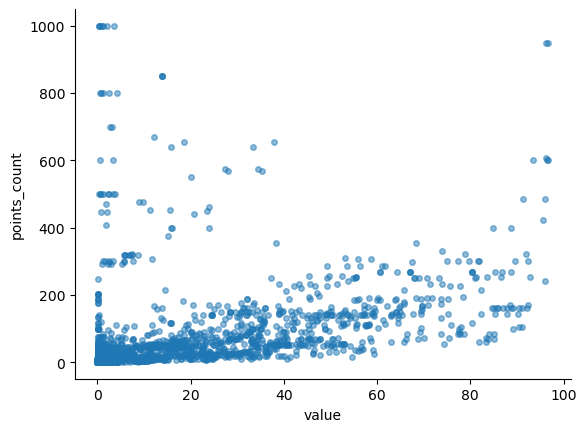

In [16]:
df_norm.plot(kind='scatter', x='value', y='points_count', s=16, alpha=.5)
plt.gca().spines[['top', 'right',]].set_visible(False)

## distance from center of Moscow

In [17]:
lat_center = 55.7522
lon_center = 37.6156

In [18]:
df_norm['distance_center'] = df_norm['points'].apply(lambda points: [((float(point['lat']) - lat_center) ** 2 + (float(point['lon']) - lon_center) ** 2) ** 0.5 for point in points]).apply(sum) / df_norm['points_count']

In [19]:
df_norm

,hash,points,value,name,gender,ageFrom,ageTo,income,points_count,distance_center
0,41567f28db47bee7,"[{'lat': '55.573691', 'lon': '37.631423', 'azi...",23.51,All 25-45 BC,all,25,45,bc,25,0.207695
1,94b6df335598a161,"[{'lat': '55.656665886902', 'lon': '37.7408534...",1.20,W 30-60,female,30,60,abc,24,0.134828
2,2ef4e73f0d2c51d0,"[{'lat': '55.680953807163', 'lon': '37.6644265...",4.65,W 30-60,female,30,60,abc,34,0.121927
3,b3ebb77f965de304,"[{'lat': '55.741072317672', 'lon': '37.6526972...",32.09,W 30+ BC,female,30,100,bc,160,0.134150
4,76059b6cbb303166,"[{'lat': '55.656665886902', 'lon': '37.7408534...",26.12,W 30+ BC,female,30,100,bc,44,0.122182
...,...,...,...,...,...,...,...,...,...,...
1542,75563c4cce5ca6c0,"[{'lat': '55.961879', 'lon': '37.333988', 'azi...",20.55,All 30-55 BC,all,30,55,bc,27,0.241312
1543,ed4353d7c33dd21c,"[{'lat': '55.752846850282', 'lon': '37.5875834...",59.32,35-100 C,all,35,100,c,24,0.151788
1544,77a82843b71a77ec,"[{'lat': '55.752846850282', 'lon': '37.5875834...",41.30,35-100 C,all,35,100,c,15,0.192977
1545,87b45be3fae91c39,"[{'lat': '55.662899746091', 'lon': '37.4817413...",59.15,M 25-55,male,25,55,abc,37,0.156199


In [20]:
df_norm_distance_filter = df_norm[df_norm['distance_center'] < 2.5]

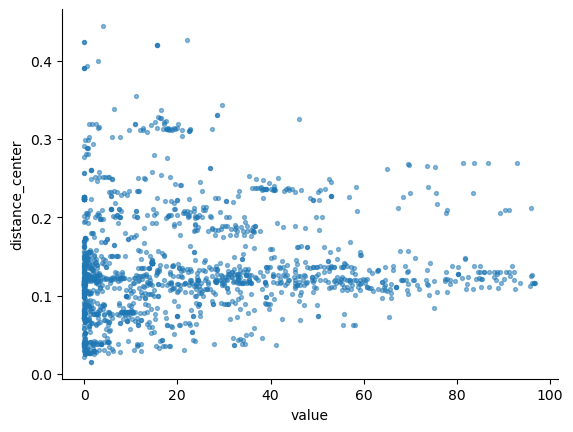

In [21]:
df_norm_distance_filter.plot(kind='scatter', x='value', y='distance_center', s=8, alpha=.5)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='income', ylabel='distance_center'>

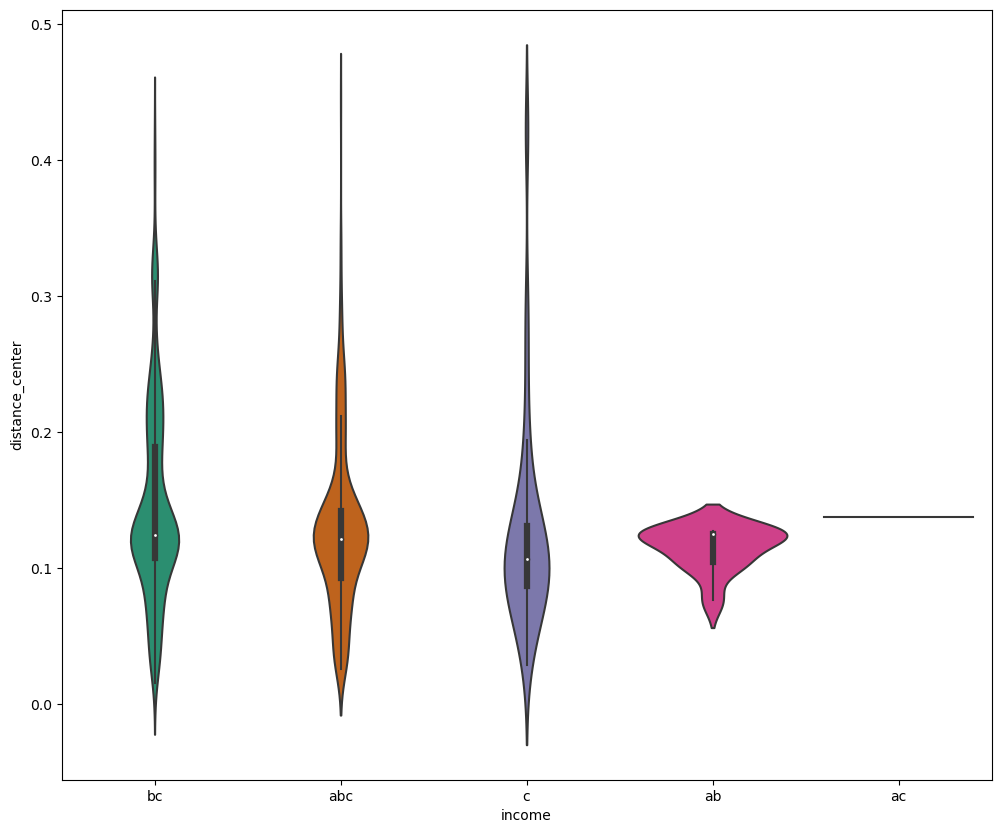

In [22]:
plt.figure(figsize=(12, 10))
sns.violinplot(df_norm_distance_filter, x='income', y='distance_center', inner='box', palette='Dark2')

## visualise points
стоит подумать над охватом каждой точки в среднем

In [23]:
points = np.array([[float(x['lat']), float(x['lon'])] for x in df_norm['points'][0]])
points

array([[55.573691  , 37.631423  ],
       [55.584765  , 37.712454  ],
       [55.80842546, 37.38880796],
       [55.674378  , 37.422364  ],
       [55.608396  , 37.766383  ],
       [55.908622  , 37.553523  ],
       [55.71      , 37.3875    ],
       [55.626667  , 37.472993  ],
       [55.82762   , 37.832285  ],
       [55.864929  , 37.402182  ],
       [55.79614   , 37.377824  ],
       [55.878467  , 37.734767  ],
       [55.835535  , 37.816508  ],
       [55.572631  , 37.648526  ],
       [55.897735  , 37.642363  ],
       [55.668107  , 37.838745  ],
       [55.676858  , 37.835067  ],
       [55.582222  , 37.706667  ],
       [55.75782046, 37.8428632 ],
       [55.877894  , 37.431545  ],
       [55.893822  , 37.499453  ],
       [55.620483  , 37.788833  ],
       [55.902938  , 37.615667  ],
       [55.77514043, 37.37006949],
       [55.8220076 , 37.39308249]])

In [24]:
def plot_points(df, images_per_row = 5,  centering = False):

    num_rows = len(df) // images_per_row + int(len(df) % images_per_row != 0)
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(20, 4 * num_rows))


    for i in range(num_rows * images_per_row):
        if i < len(df):
            ax = axes.flat[i]

            g = df.iloc[i]
            points = np.array([[float(x['lat']), float(x['lon'])] for x in g['points']])
            ax.scatter(points[:, 0], points[:, 1])
            ax.axis('on')

            ax.set_title(f"{g['name']} | {g['gender']} | {g['value']} | {np.round(g['value']/len(points),2)}")

            if centering:
              #большинство точек находится в этом диапазоне
              ax.set_ylim(37.3, 37.9)
              ax.set_xlim(55.55, 55.95)
        else:
            axes.flat[i].axis('off')


    plt.tight_layout()
    plt.show()

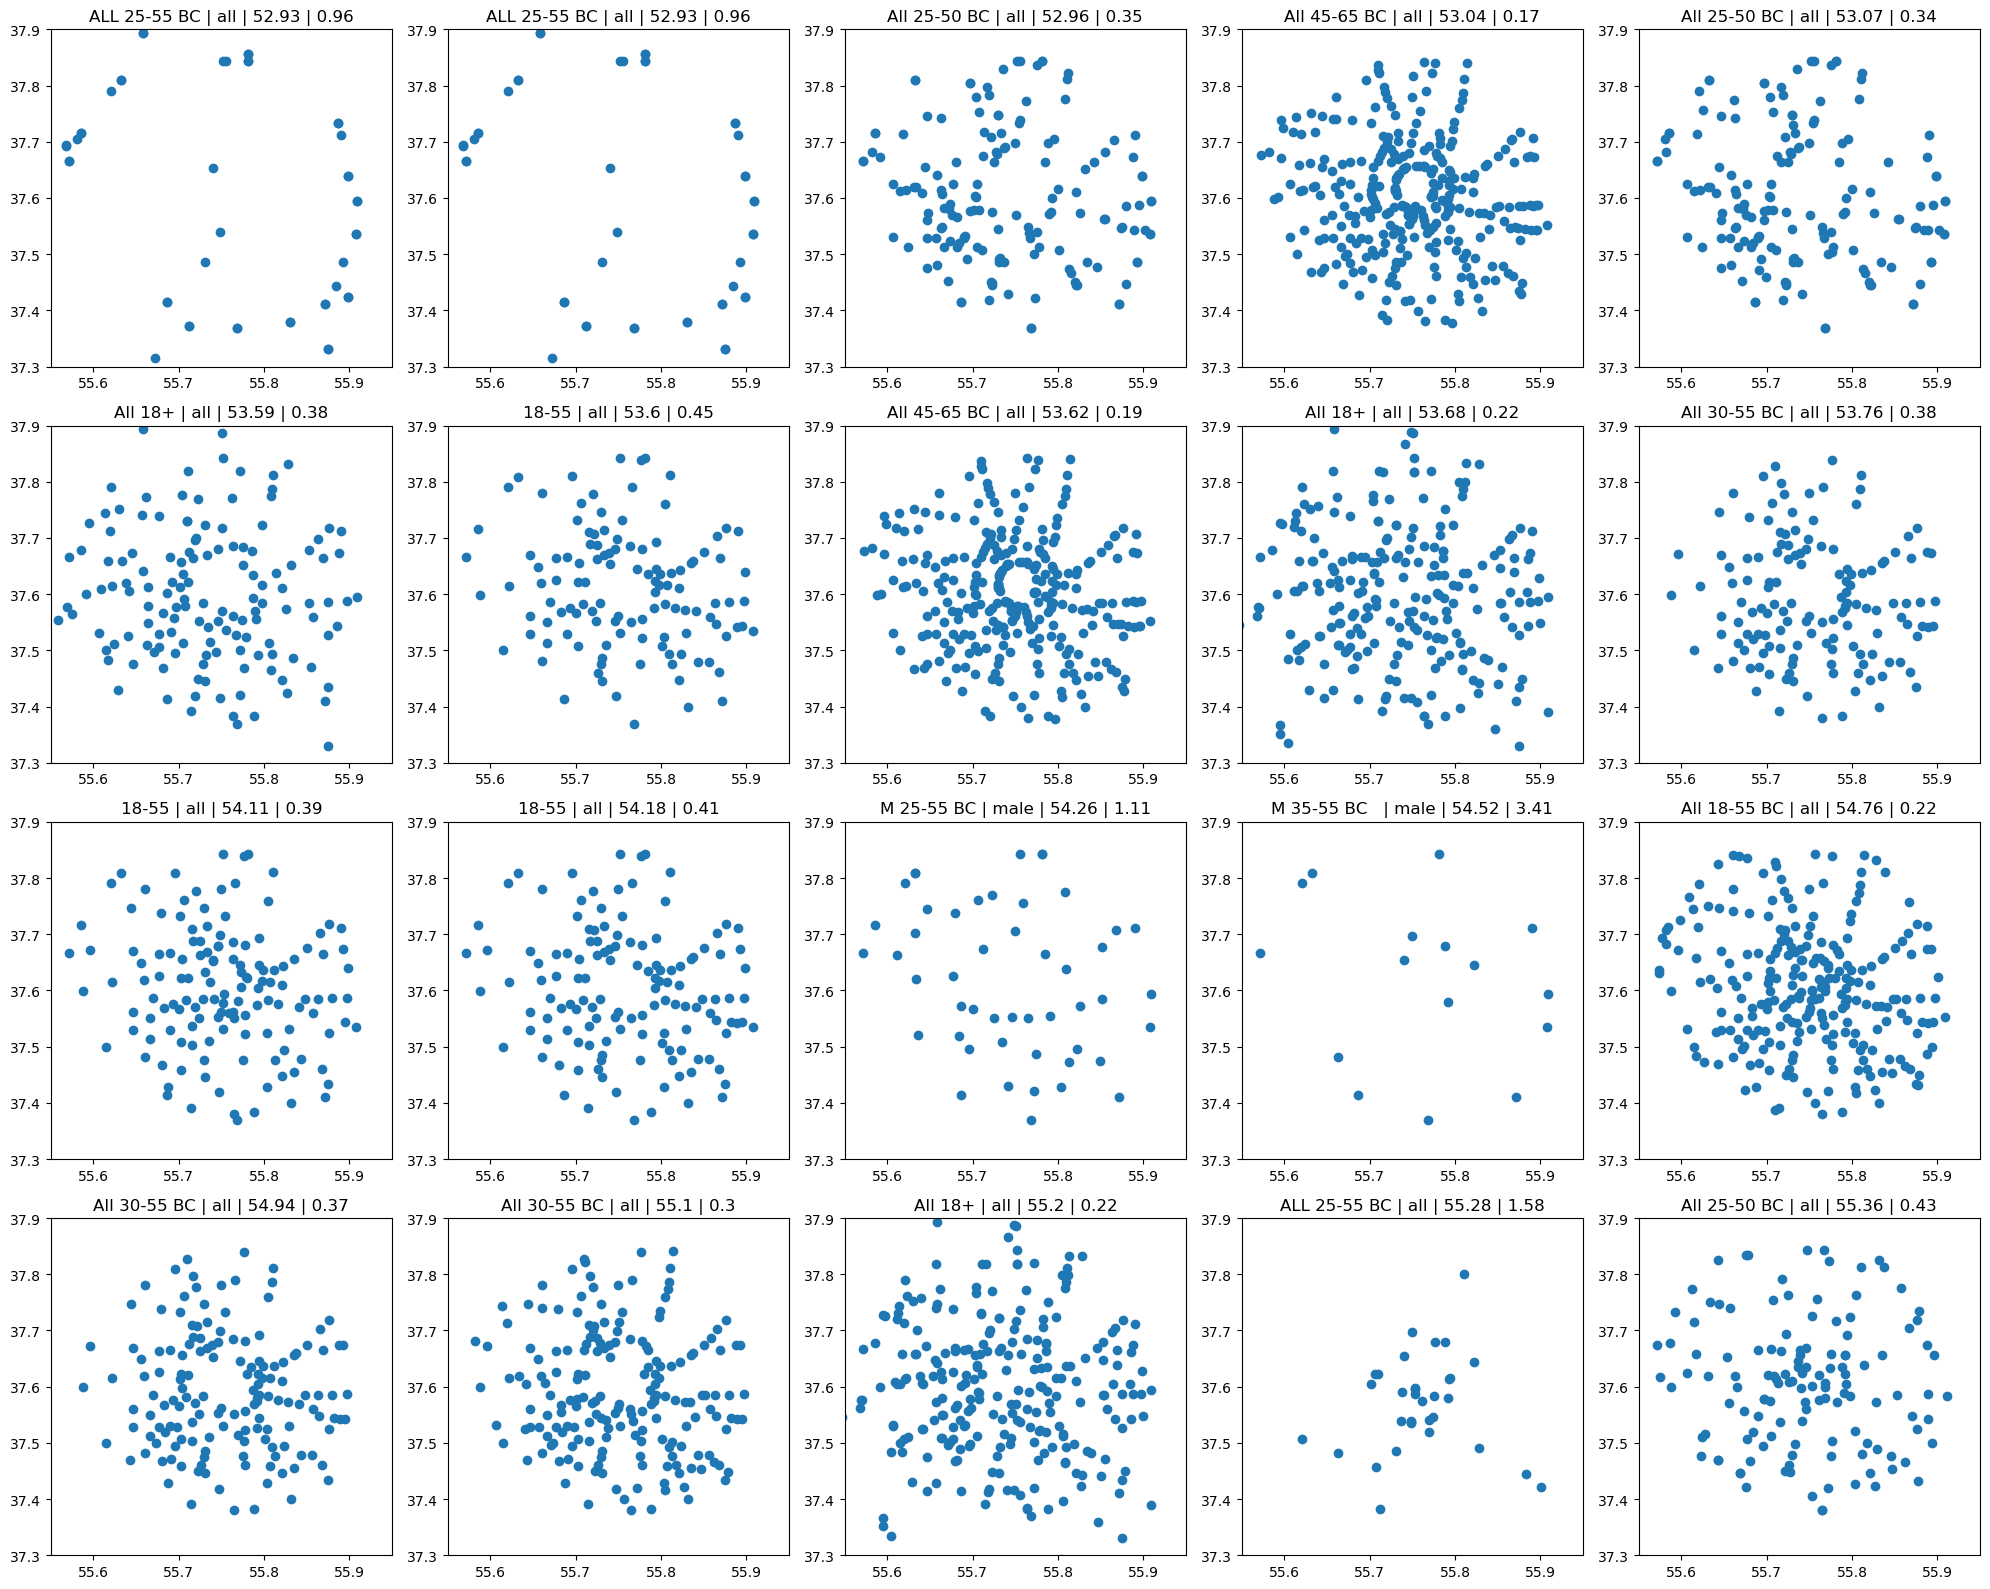

In [25]:
# Группа | пол | охват | охват каждой точки в среднем
plot_points(df_norm.sort_values('value').iloc[-200:-180], centering = True)

In [26]:
df_norm['mean_value'] = df_norm['value'] / df_norm['points_count']

In [27]:
df_not_1_point = df_norm[df_norm['points_count'] == 1]

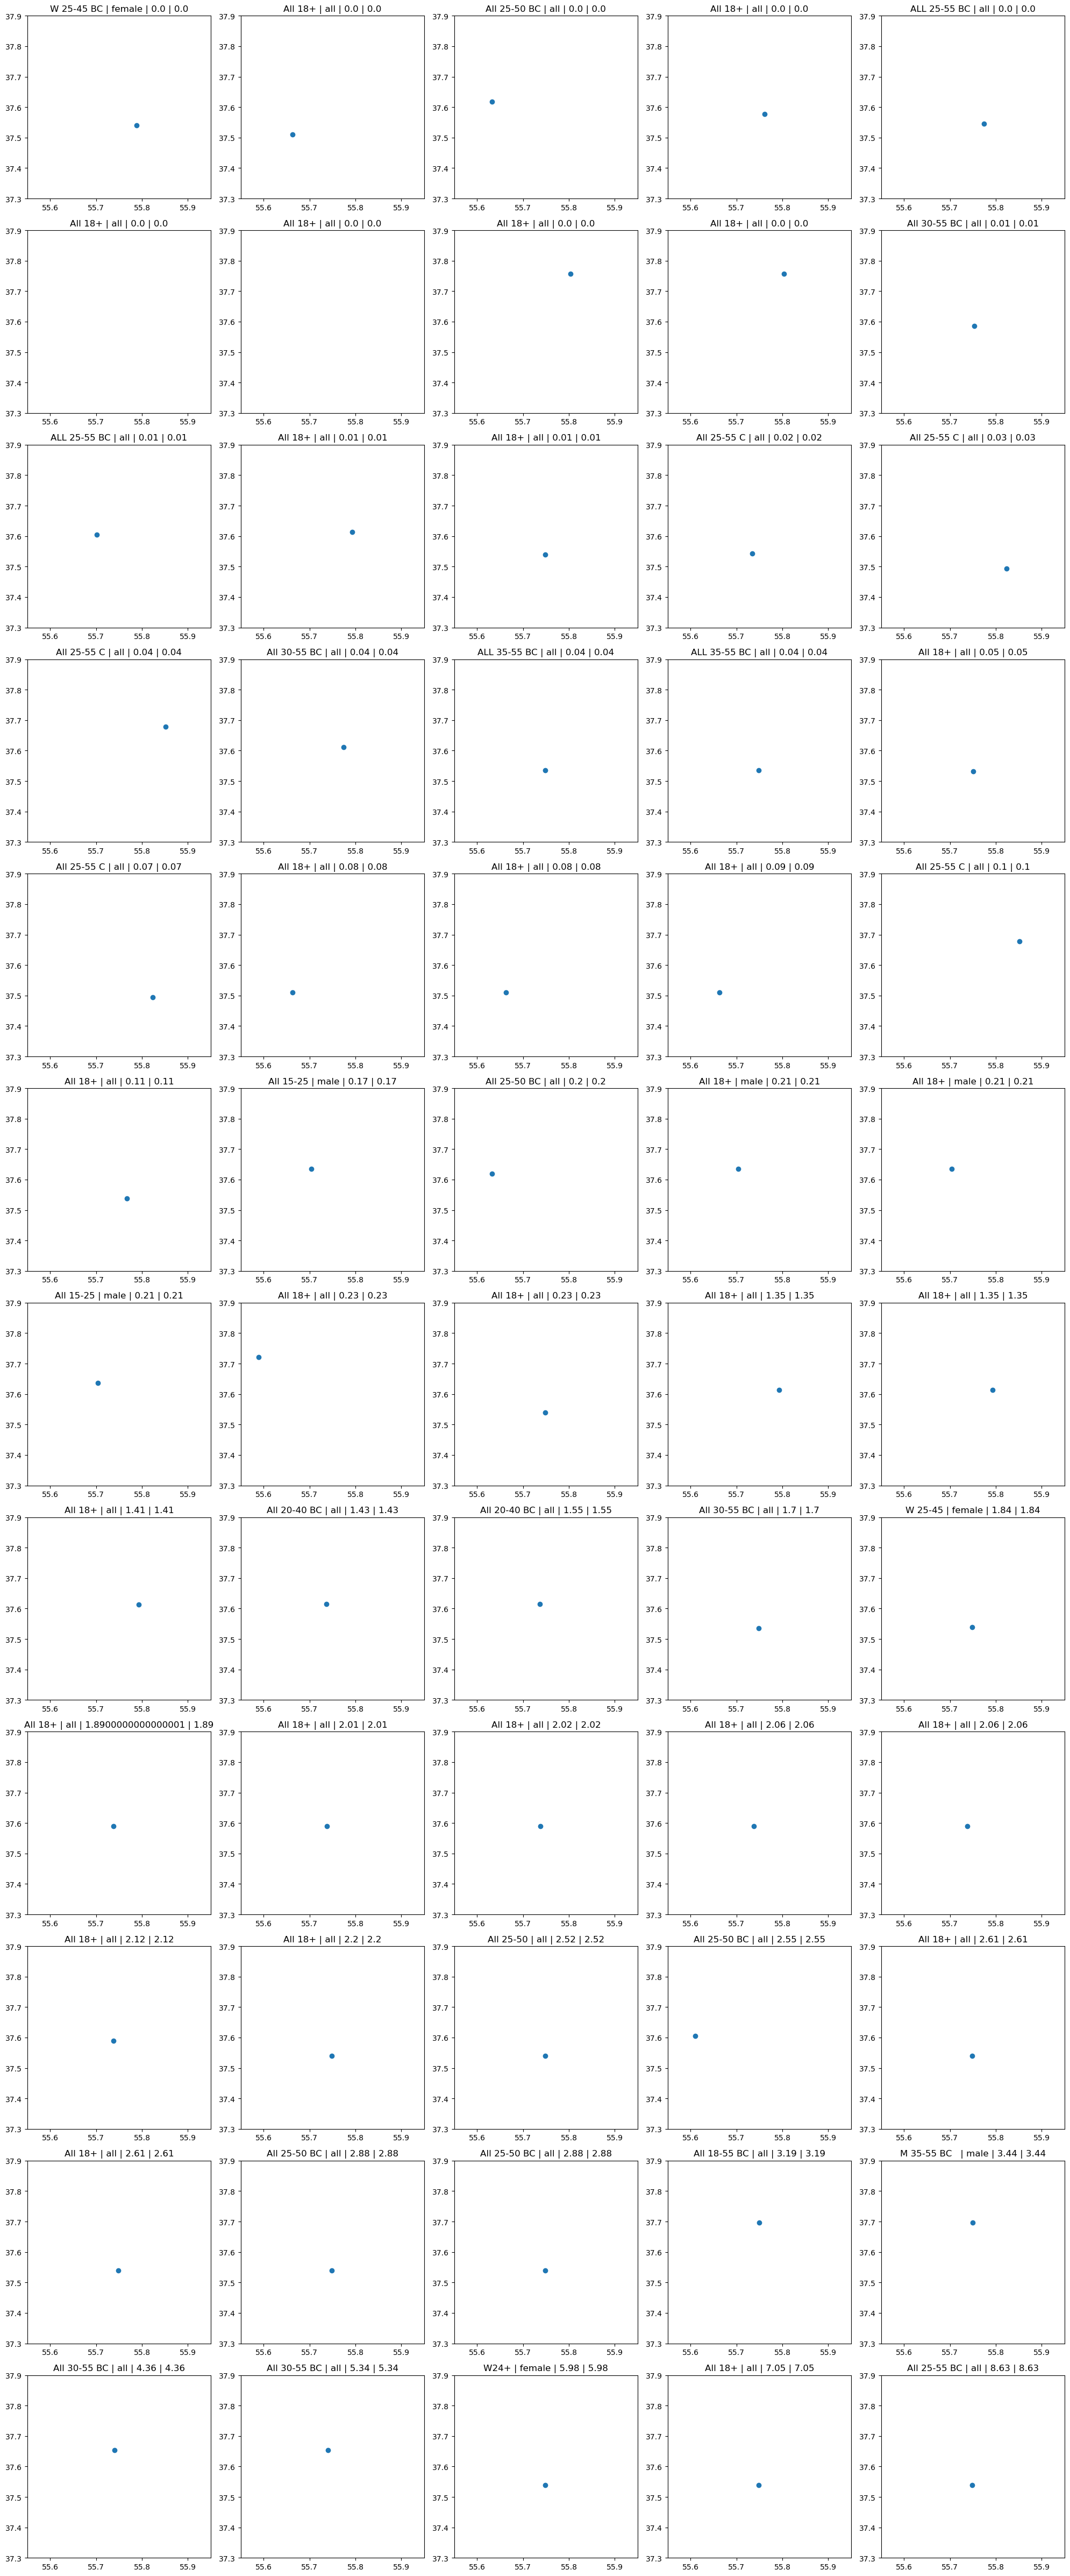

In [28]:
# Группа | пол | охват | охват каждой точки в среднем
plot_points(df_not_1_point.sort_values('mean_value').iloc[-60:], centering = True)

## hists and outliers

In [29]:
df_norm

,hash,points,value,name,gender,ageFrom,ageTo,income,points_count,distance_center,mean_value
0,41567f28db47bee7,"[{'lat': '55.573691', 'lon': '37.631423', 'azi...",23.51,All 25-45 BC,all,25,45,bc,25,0.207695,0.940400
1,94b6df335598a161,"[{'lat': '55.656665886902', 'lon': '37.7408534...",1.20,W 30-60,female,30,60,abc,24,0.134828,0.050000
2,2ef4e73f0d2c51d0,"[{'lat': '55.680953807163', 'lon': '37.6644265...",4.65,W 30-60,female,30,60,abc,34,0.121927,0.136765
3,b3ebb77f965de304,"[{'lat': '55.741072317672', 'lon': '37.6526972...",32.09,W 30+ BC,female,30,100,bc,160,0.134150,0.200563
4,76059b6cbb303166,"[{'lat': '55.656665886902', 'lon': '37.7408534...",26.12,W 30+ BC,female,30,100,bc,44,0.122182,0.593636
...,...,...,...,...,...,...,...,...,...,...,...
1542,75563c4cce5ca6c0,"[{'lat': '55.961879', 'lon': '37.333988', 'azi...",20.55,All 30-55 BC,all,30,55,bc,27,0.241312,0.761111
1543,ed4353d7c33dd21c,"[{'lat': '55.752846850282', 'lon': '37.5875834...",59.32,35-100 C,all,35,100,c,24,0.151788,2.471667
1544,77a82843b71a77ec,"[{'lat': '55.752846850282', 'lon': '37.5875834...",41.30,35-100 C,all,35,100,c,15,0.192977,2.753333
1545,87b45be3fae91c39,"[{'lat': '55.662899746091', 'lon': '37.4817413...",59.15,M 25-55,male,25,55,abc,37,0.156199,1.598649


In [30]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df_norm['points_count']))
df_norm = df_norm.iloc[(z < 3).values]

/Users/ivanmironov/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='points_count', ylabel='Count'>

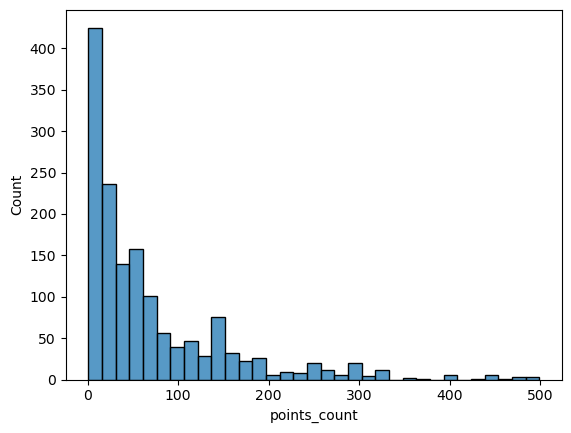

In [31]:
sns.histplot(data=df_norm, x='points_count')

In [32]:
df_norm = df_norm[df_norm['distance_center'] < 2]

/Users/ivanmironov/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='distance_center', ylabel='Count'>

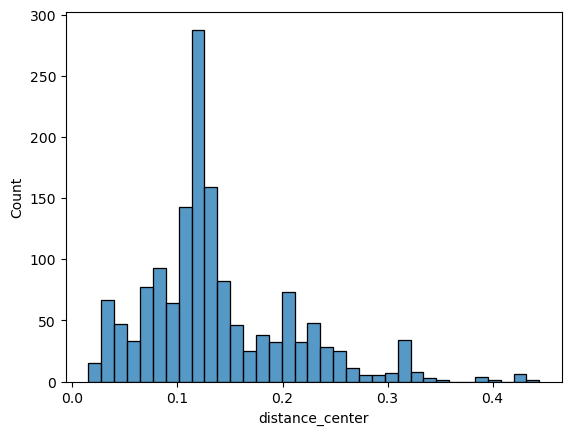

In [33]:
sns.histplot(data=df_norm, x='distance_center')

In [34]:
z = np.abs(stats.zscore(df_norm['mean_value']))
df_norm = df_norm.iloc[(z < 3).values]

/Users/ivanmironov/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='mean_value', ylabel='Count'>

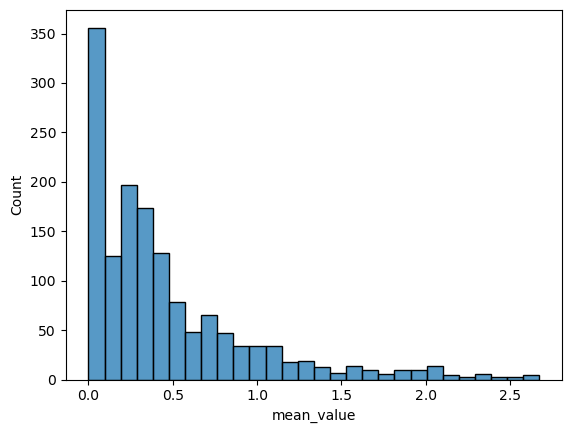

In [35]:
sns.histplot(data=df_norm, x='mean_value')

/Users/ivanmironov/anaconda3/envs/data_science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='value', ylabel='Count'>

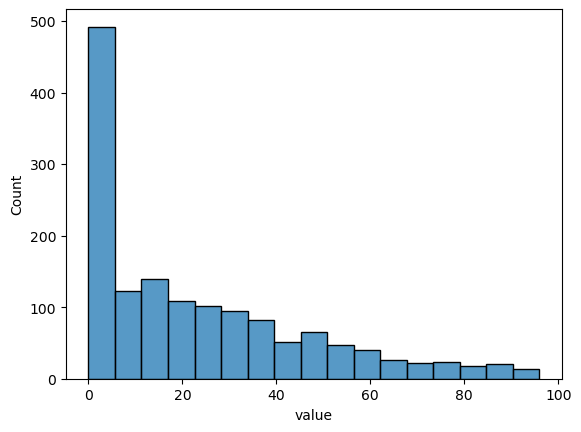

In [36]:
sns.histplot(data=df_norm, x='value')

# unique points count

In [ ]:
df_norm['points']

In [ ]:
points = []
for i in df_norm['points']:
    for j in i:
        points += [(j['lat'], j['lon'])]

In [ ]:
len(points), len(set(points))

In [ ]:
points = []
for i in df_norm['points']:
    for j in i:
        points += [(j['lat'], j['lon'], j['azimuth'])]

In [ ]:
len(points), len(set(points))